### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
Work in a group whom you did not worked before and submit the work before Next class
- Rename the notebook Practice_ClassNB_Pandas_XX (your initial)
- Indivijual submission 

#### Import pandas, numpy

In [1]:
import pandas as pd 
import numpy as np

### 1. Load the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
pd.read_csv('311-service-requests.csv',dtype='unicode')
complaints=pd.read_csv('311-service-requests.csv',dtype='unicode')

### 2. What's even in it? (the summary)


In [3]:
complaints.columns=[column.replace(" ", "_") for column in complaints.columns]

In [4]:
complaints.describe()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
count,111069,111069,60270,111069,111069,111069,110613,79022,98807,84441,...,185,185,180,219,49,24,70,98143,98143,98143
unique,111069,57872,35596,26,135,165,788,90,248,41189,...,37,38,2,160,17,2,39,50653,50505,50653
top,26589651,10/24/2013 12:00:00 AM,10/28/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226,130 AUDUBON AVENUE,...,BQE/Gowanus Expwy,East/Long Island Bound,Roadway,Roadway,Flushing #1 Field,Staten Island Bound,Unknown,40.842708163812766,-73.93675169432969,"(40.842708163812766, -73.93675169432969)"
freq,1,3659,1359,39067,39067,14200,14126,39067,1996,120,...,24,22,127,11,12,13,14,120,120,120


In [5]:
print(complaints.head(5))
print(complaints.tail(5))
print(complaints.columns)
print(f'lenght: {len(complaints)}')

  Unique_Key            Created_Date             Closed_Date Agency  \
0   26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1   26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2   26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   
3   26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD   
4   26590930  10/31/2013 01:53:44 AM                     NaN  DOHMH   

                               Agency_Name           Complaint_Type  \
0          New York City Police Department  Noise - Street/Sidewalk   
1          New York City Police Department          Illegal Parking   
2          New York City Police Department       Noise - Commercial   
3          New York City Police Department          Noise - Vehicle   
4  Department of Health and Mental Hygiene                   Rodent   

                     Descriptor        Location_Type Incident_Zip  \
0                  Loud Talking      Street/Sidewalk        11432   
1  Comme

In [6]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique_Key                      111069 non-null  object
 1   Created_Date                    111069 non-null  object
 2   Closed_Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency_Name                     111069 non-null  object
 5   Complaint_Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location_Type                   79022 non-null   object
 8   Incident_Zip                    98807 non-null   object
 9   Incident_Address                84441 non-null   object
 10  Street_Name                     84432 non-null   object
 11  Cross_Street_1                  84728 non-null   object
 12  Cross_Street_2                

### spaces in column names are replaced with ‘_’
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]

In [7]:
complaints.columns =[column.replace(" ", "_") for column in complaints.columns]

### 3. Which month and year the complains received?


In [8]:
complaints['Created_Date']=pd.to_datetime(complaints['Created_Date'])
complaints['Year']=complaints['Created_Date'].dt.year
complaints['Month']=complaints['Created_Date'].dt.month
complaints['Month'].value_counts()
complaints['Year'].value_counts()

Year
2013    111069
Name: count, dtype: int64

In [9]:
complaints.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Year,Month
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)",2013,10
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013,10
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)",2013,10
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)",2013,10
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)",2013,10


In [10]:
complaints.value_counts('Bridge_Highway_Segment')

Bridge_Highway_Segment
Roadway                                                                             11
Ramp                                                                                10
150th St (Exit 20) - Farmers Blvd. Guy R. Brewer Blvd. (Exit 21B)                    8
Bikepath                                                                             5
McGuinness Blvd / Humboldt St (Exit 33) - Kosciuszko Br (to Queens)                  5
                                                                                    ..
Begin Korean War Vets Pkwy/Arthur Kill Rd - Arden Ave                                1
Bell Blvd (Exit 32) - Throgs Neck Br (I-295) / Clearview Expwy (I-295) (Exit 33)     1
Belmont Park (Exit 26A)                                                              1
Belmont Park (Exit 26A) - Hempstead Trnpke / Hempstead Ave (NY 24) (Exit 26 B-C)     1
Woodrow Rd/Bloomingdale Rd (Exit 3) - Arthur Kill Rd (Exit 4)                        1
Name: count, Length:

the complaints occured on october in 2013

### 4. Drop the columns which you are not going to use for any analysis/ not bringing any meaningful informations/ most of the entries are null (Find out 5 and explain why you selected that)

In [11]:
complaints.drop(['Road_Ramp','Bridge_Highway_Segment','Garage_Lot_Name','Ferry_Direction','Ferry_Terminal_Name','Latitude','Longitude','Location'],axis=1,inplace=True),

(None,)

In [12]:
complaints.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Zip,School_Not_Found,School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Year,Month
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10


I dropped road ramp, bridge highway segment, garage lot name, ferry direction, ferry terminal name, latitude, and longitude because all of these describe the location the incident happened in, but we can derive that information fronm the Street Name and incident address, which were not removed.

### 5. Is there any missing value in the dataset? Display the list.
Impute the missing values in Street_Name, Address_Type, and City 

In [13]:
print(f"missing values for street name: {complaints['Street_Name'].isnull().sum()}")
print(f"missing values for address type: {complaints['Address_Type'].isnull().sum()}")
print(f"missing values for city: {complaints['City'].isnull().sum()}")

missing values for street name: 26637
missing values for address type: 8822
missing values for city: 12215


In [14]:
Street_mode=complaints['Street_Name'].mode()[0]
complaints['Street_Name'].fillna(Street_mode, inplace=True)
print(f"missing values for street name: {complaints['Street_Name'].isnull().sum()}")
Address_mode=complaints['Address_Type'].mode()[0]
complaints['Address_Type'].fillna(Address_mode, inplace=True)
print(f"missing values for address type: {complaints['Address_Type'].isnull().sum()}")
City_mode=complaints['City'].mode()[0]
complaints['City'].fillna(City_mode, inplace=True)
print(f"missing values for city: {complaints['City'].isnull().sum()}")

missing values for street name: 0
missing values for address type: 0
missing values for city: 0


### 6. What are the top 5 `complains` received? Show the result graphically using bar plot.

<Axes: xlabel='Complaint_Type'>

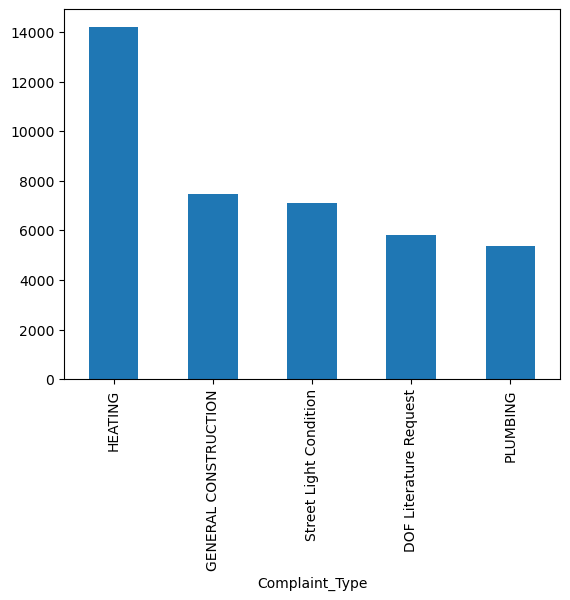

In [15]:
complaints['Complaint_Type'].value_counts().nlargest(5).plot(kind="bar")

the top 5 were heating, general construction, street light condition, DOF literature request, and plumbing

### 7. What's the most common `Borough` the complain came? Display top 5 most and plot them out

<Axes: xlabel='Borough'>

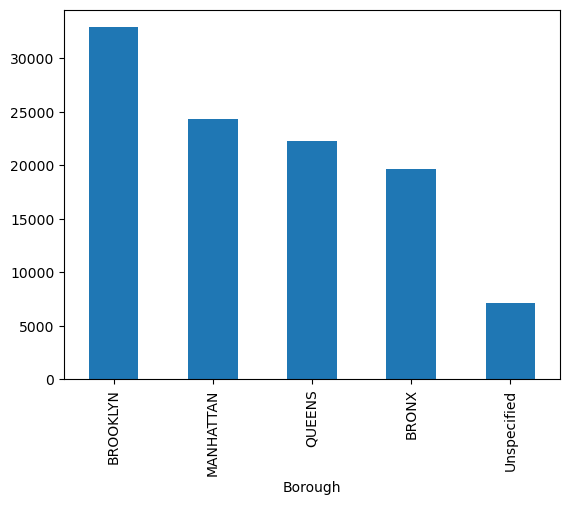

In [16]:
complaints['Borough'].value_counts().nlargest(5).plot(kind="bar")

### 8. Which agency received the most complain and which one least?

In [17]:
complaints['Agency'].value_counts()

Agency
HPD      39067
DOT      17707
NYPD     15295
DEP       8897
DSNY      8385
DOF       6370
DPR       4614
DOHMH     3237
DOB       3014
TLC       1491
DCA       1405
FDNY       631
HRA        392
DHS        101
EDC         99
DOE         97
3-1-1       92
CHALL       77
DOITT       31
OEM         29
DFTA        22
OPS          8
OATH         4
DOP          2
COIB         1
OMB          1
Name: count, dtype: int64

In [18]:
complaints['Agency'].value_counts().head(1)

Agency
HPD    39067
Name: count, dtype: int64

In [19]:
complaints['Agency'].value_counts().tail(1)

Agency
OMB    1
Name: count, dtype: int64

HPD received the most complaints and OMB received the least complaints

## 9. Investigate the data set and look for meaningful information for two more questions (Individual/ discuss with partner)
We will discuss the new findings in Tueaday's class

In [29]:
# how many complaints did each agency revceive
complaints['Agency'].value_counts()

Agency
HPD      39067
DOT      17707
NYPD     15295
DEP       8897
DSNY      8385
DOF       6370
DPR       4614
DOHMH     3237
DOB       3014
TLC       1491
DCA       1405
FDNY       631
HRA        392
DHS        101
EDC         99
DOE         97
3-1-1       92
CHALL       77
DOITT       31
OEM         29
DFTA        22
OPS          8
OATH         4
DOP          2
COIB         1
OMB          1
Name: count, dtype: int64

In [21]:
# how many complaints of certain types
complaints.groupby(['Complaint_Type'])['Agency'].count()

Complaint_Type
APPLIANCE                   445
Adopt-A-Basket                3
Agency Issues               174
Air Quality                 459
Animal Abuse                164
                           ... 
Water Conservation          130
Water Quality                89
Water System               2636
Window Guard                  2
X-Ray Machine/Equipment       1
Name: Agency, Length: 165, dtype: int64

### 10. Select illegal Parking complains at Queens Borough and save it to new_complaint. How many entries are there?
You can use `query`/iloc

In [25]:
new_complaint=complaints.query('Complaint_Type=="Illegal Parking" & Borough=="QUEENS"')
len(new_complaint)
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Zip,School_Not_Found,School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Year,Month
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
116,26591037,2013-10-30 23:20:57,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
117,26592954,2013-10-30 23:20:26,10/31/2013 01:18:56 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
140,26592551,2013-10-30 23:01:49,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
186,26591575,2013-10-30 22:33:28,10/30/2013 11:06:35 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110969,26428092,2013-10-04 01:32:20,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11377,NaN,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
111000,26431018,2013-10-04 01:08:14,10/04/2013 07:09:47 AM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11435,147-23 ARCHER AVENUE,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
111030,26431986,2013-10-04 00:28:01,10/04/2013 03:02:09 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11385,78-51 81 STREET,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10
111047,26428989,2013-10-04 00:13:08,10/04/2013 02:12:47 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,10


there are 22281 complaints at queens.

### 11. Filter 3 columns `Complaint_Type, Created_Date,Descriptor` from the new_complaint and save it as a CSV file named **Complains at Queens**.

In [26]:
new_complaint=new_complaint[['Complaint_Type','Created_Date','Descriptor']]
new_complaint.to_csv('newdata',index=False)

### 12. Load it back to verify the data

In [28]:
complaint=pd.read_csv('newdata', index_col=[0])
complaint.head()

,Created_Date,Descriptor
Complaint_Type,,
Illegal Parking,2013-10-31 02:01:04,Commercial Overnight Parking
Illegal Parking,2013-10-30 23:20:57,Blocked Hydrant
Illegal Parking,2013-10-30 23:20:26,Posted Parking Sign Violation
Illegal Parking,2013-10-30 23:01:49,Commercial Overnight Parking
Illegal Parking,2013-10-30 22:33:28,Commercial Overnight Parking
